# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset is a classic dataset used for clustering tasks. It consists of many samples of wine. Here are the key features and characteristics of the dataset:

##### Features (13 chemical properties):
1. Alcohol: The percentage of alcohol in the wine.
2. Malic acid: A type of acid found in grapes, contributing to wine’s tartness.
3. Ash: The total amount of non-volatile substances left after burning the wine
4. Alcalinity of ash: Measures the alkalinity of the ash component of wine.
5. Magnesium: The amount of magnesium in the wine (measured in mg/L).
6. Total phenols: Represents the total amount of phenolic compounds in wine.
7. Flavanoids: A type of phenolic compound responsible for bitterness and astringency.
8. Nonflavanoid phenols: Phenolic compounds that are not flavonoids.
9. Proanthocyanins: A type of tannin that affects astringency and bitterness.
10. Color intensity: Measures the depth or intensity of the wine’s color. 
11. Hue: The shade of color in the wine (ratio of red to yellow tones).
12. OD280/OD315 of diluted wines: Measures the wine’s absorbance at 280 nm and 315 nm, indicating phenol concentration.
13. Proline: An amino acid found in wine, often associated with aging potential and quality.

In [49]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Wine dataset:

Use scikit-learn to load the Wine dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [50]:
from sklearn.datasets import load_wine
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Display the DataFrame
print(wine_df)

# Your code here...

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [51]:
# Explore the first few rows of the dataset

wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [52]:
# Number of rows

rows = wine_df.shape[0]
print(f'There are {rows} rows in the dataset.')

There are 178 rows in the dataset.


In [53]:
# Number of columns

columns = wine_df.shape[1]
print(f'There are {columns} columns in the dataset.')

There are 13 columns in the dataset.


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (e.g., alcohol, malic acid, ash...).


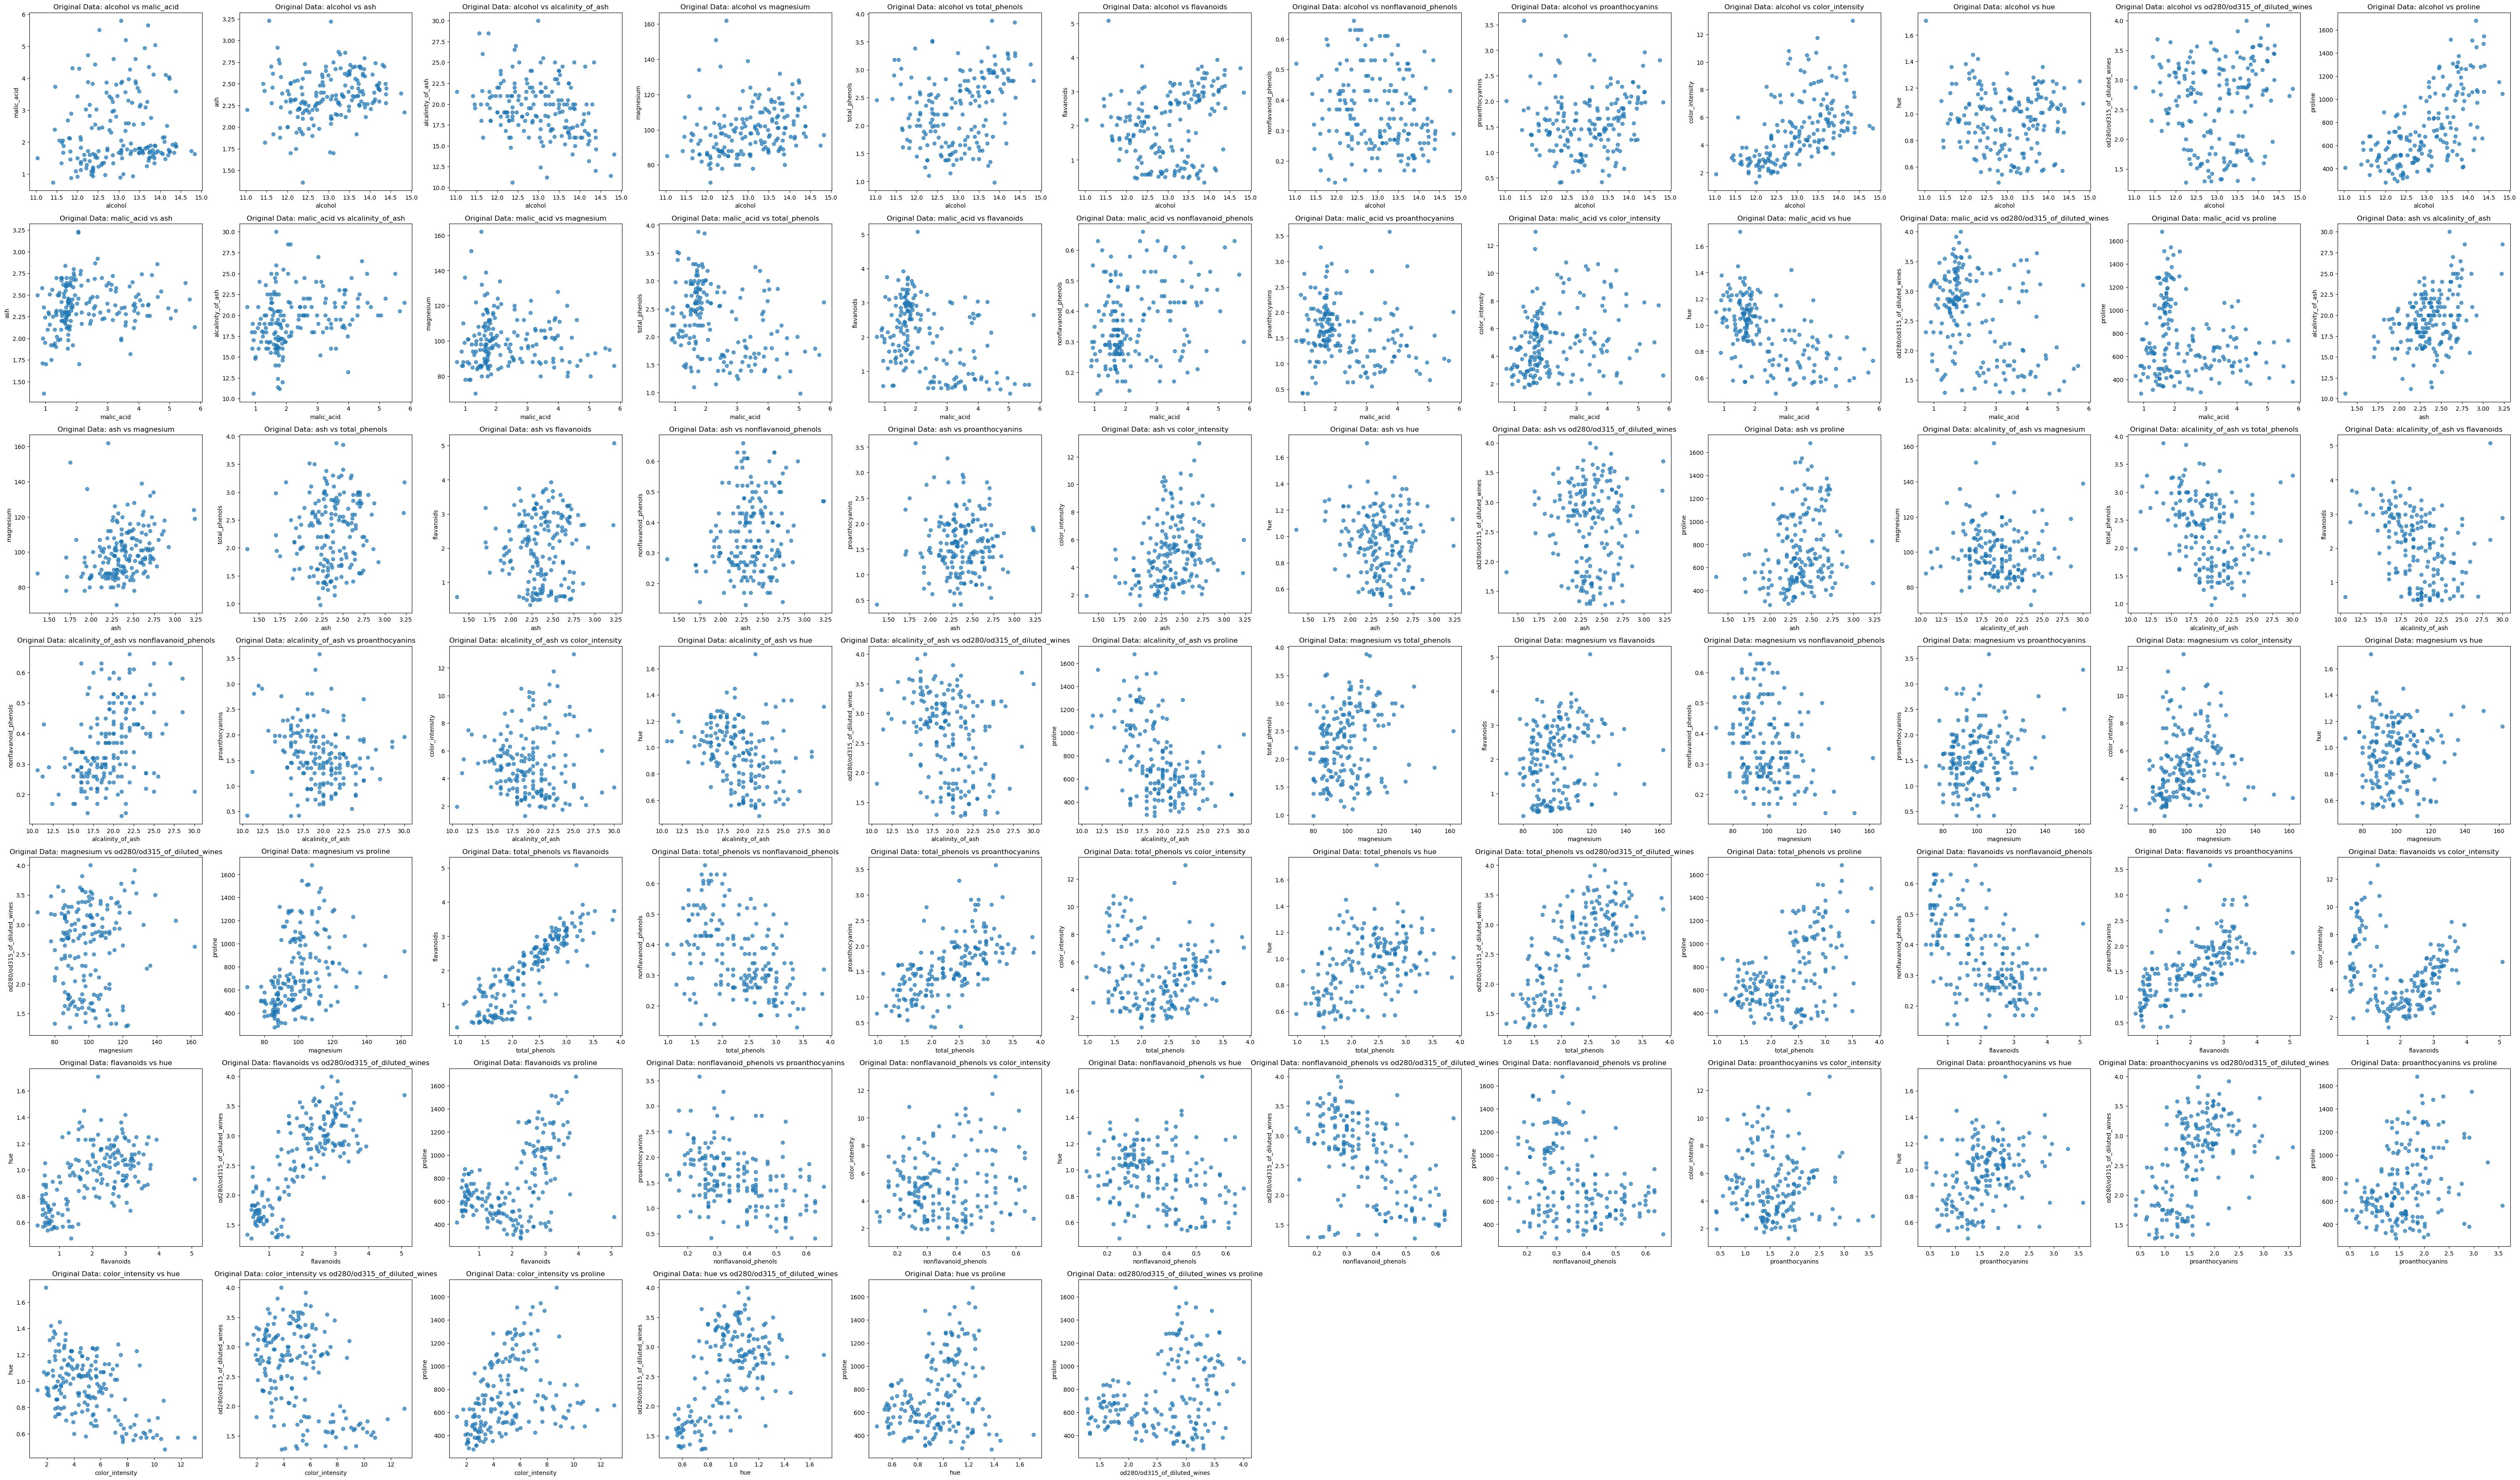

In [54]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = wine_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(wine_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

I observe what I think are reasonably strong positive correlations in the following plots: alcohol vs magnesium, alcohol vs color intensity, alcohol vs proline, ash vs alkalinity of ash, ash vs magnesium, magnesium vs color intensity, total phenols vs flavinoids, total phenols vs proanthocyanins, total phenols vs OD ratio, flavanoid vs proanthocyanins, flavonoids vs hue, flavonoids vs OD ratio, color intensity vs proline, hue vs OD ratio.

I observe what I think a reasonably strong negative correlations in the following plots: nonflavanoid phenols vs flavanoids, nonflavanoid phenols vs OD ratio,.

The remaining plots display little correlation.

These patterns may help in assigning a class to a given type of wine.  If we know, for example, that phenols are highly correlated with OD ratio, then it may be possible to estimate the wine's classification only using one of the measurements and not the other.  That said, some wine species and varieties may be distinguished by being "outliers" in these correlations.  Meaning, perhaps they have high ash content but that ash is not very alkaline.

#### **Question 3:** 
#### Data cleaning

In [55]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(wine_df)

# Create a new DataFrame with scaled features
scaled_wine_df = pd.DataFrame(scaled_features, columns=wine_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Clustering algorithms rely on distance measurements between the observed/measured parameters and a "standard" parameter.  The data need to be scaled to ensure that all the distances calculated from numerical parameters exist on a similar scale.  If this step is not taken, it is possible for one parameter with a broad range (and, therefore, large distances) to "dominate" the analysis relative to other parameters that have a smaller range.  

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Wine dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [56]:
# Make a copy of the dataframe to prevent unintentional changes to the original.

scaled_wine_df_copy = scaled_wine_df.copy()
scaled_wine_df_copy

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

In [57]:
# Just checking the "true" mean of the color_intensity for this full dataset.

scaled_wine_df_copy['color_intensity'].mean()

-3.4429388179386877e-16

In [58]:
# Perform k-means clustering

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaled_wine_df_copy)

In [59]:
# Converting the results of kmeans clustering into a dataframe with clusters labeled.

clustered_wine_data = scaled_wine_df_copy
clustered_wine_data['Cluster'] = clusters.labels_
clustered_wine_data


alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  \
0           0.251717  0.362177                      1.847920  1.013009   
1          -0.293321  0.406051                      1.113449  0.965242   
2           0.269020  0.318304                      0.788587  1.395148   
3           1.186068 -0.427544                      1.184071  2.334574   
4          -0.319276  0.362177                      0.449601 -0.037874   
..               ...       ...                           ...       ...   
173         1.142811 -1.392758                     -1.231206 -0.021952   
174         0.969783 -1.129518                     -1.485445  0.009893   
175         2.224236 -1.612125                     -1.485445  0.280575   
176         1.834923 -1.568252                     -1.400699  0.296498   
177         1.791666 -1.524378                     -1.428948 -0.595160   

     Cluster  
0          2  
1          2  
2          2  
3          2  
4          2  
..       ...  
173        1  
174        1  
175        1  
176        1  
177        1  

[178 rows x 14 columns]

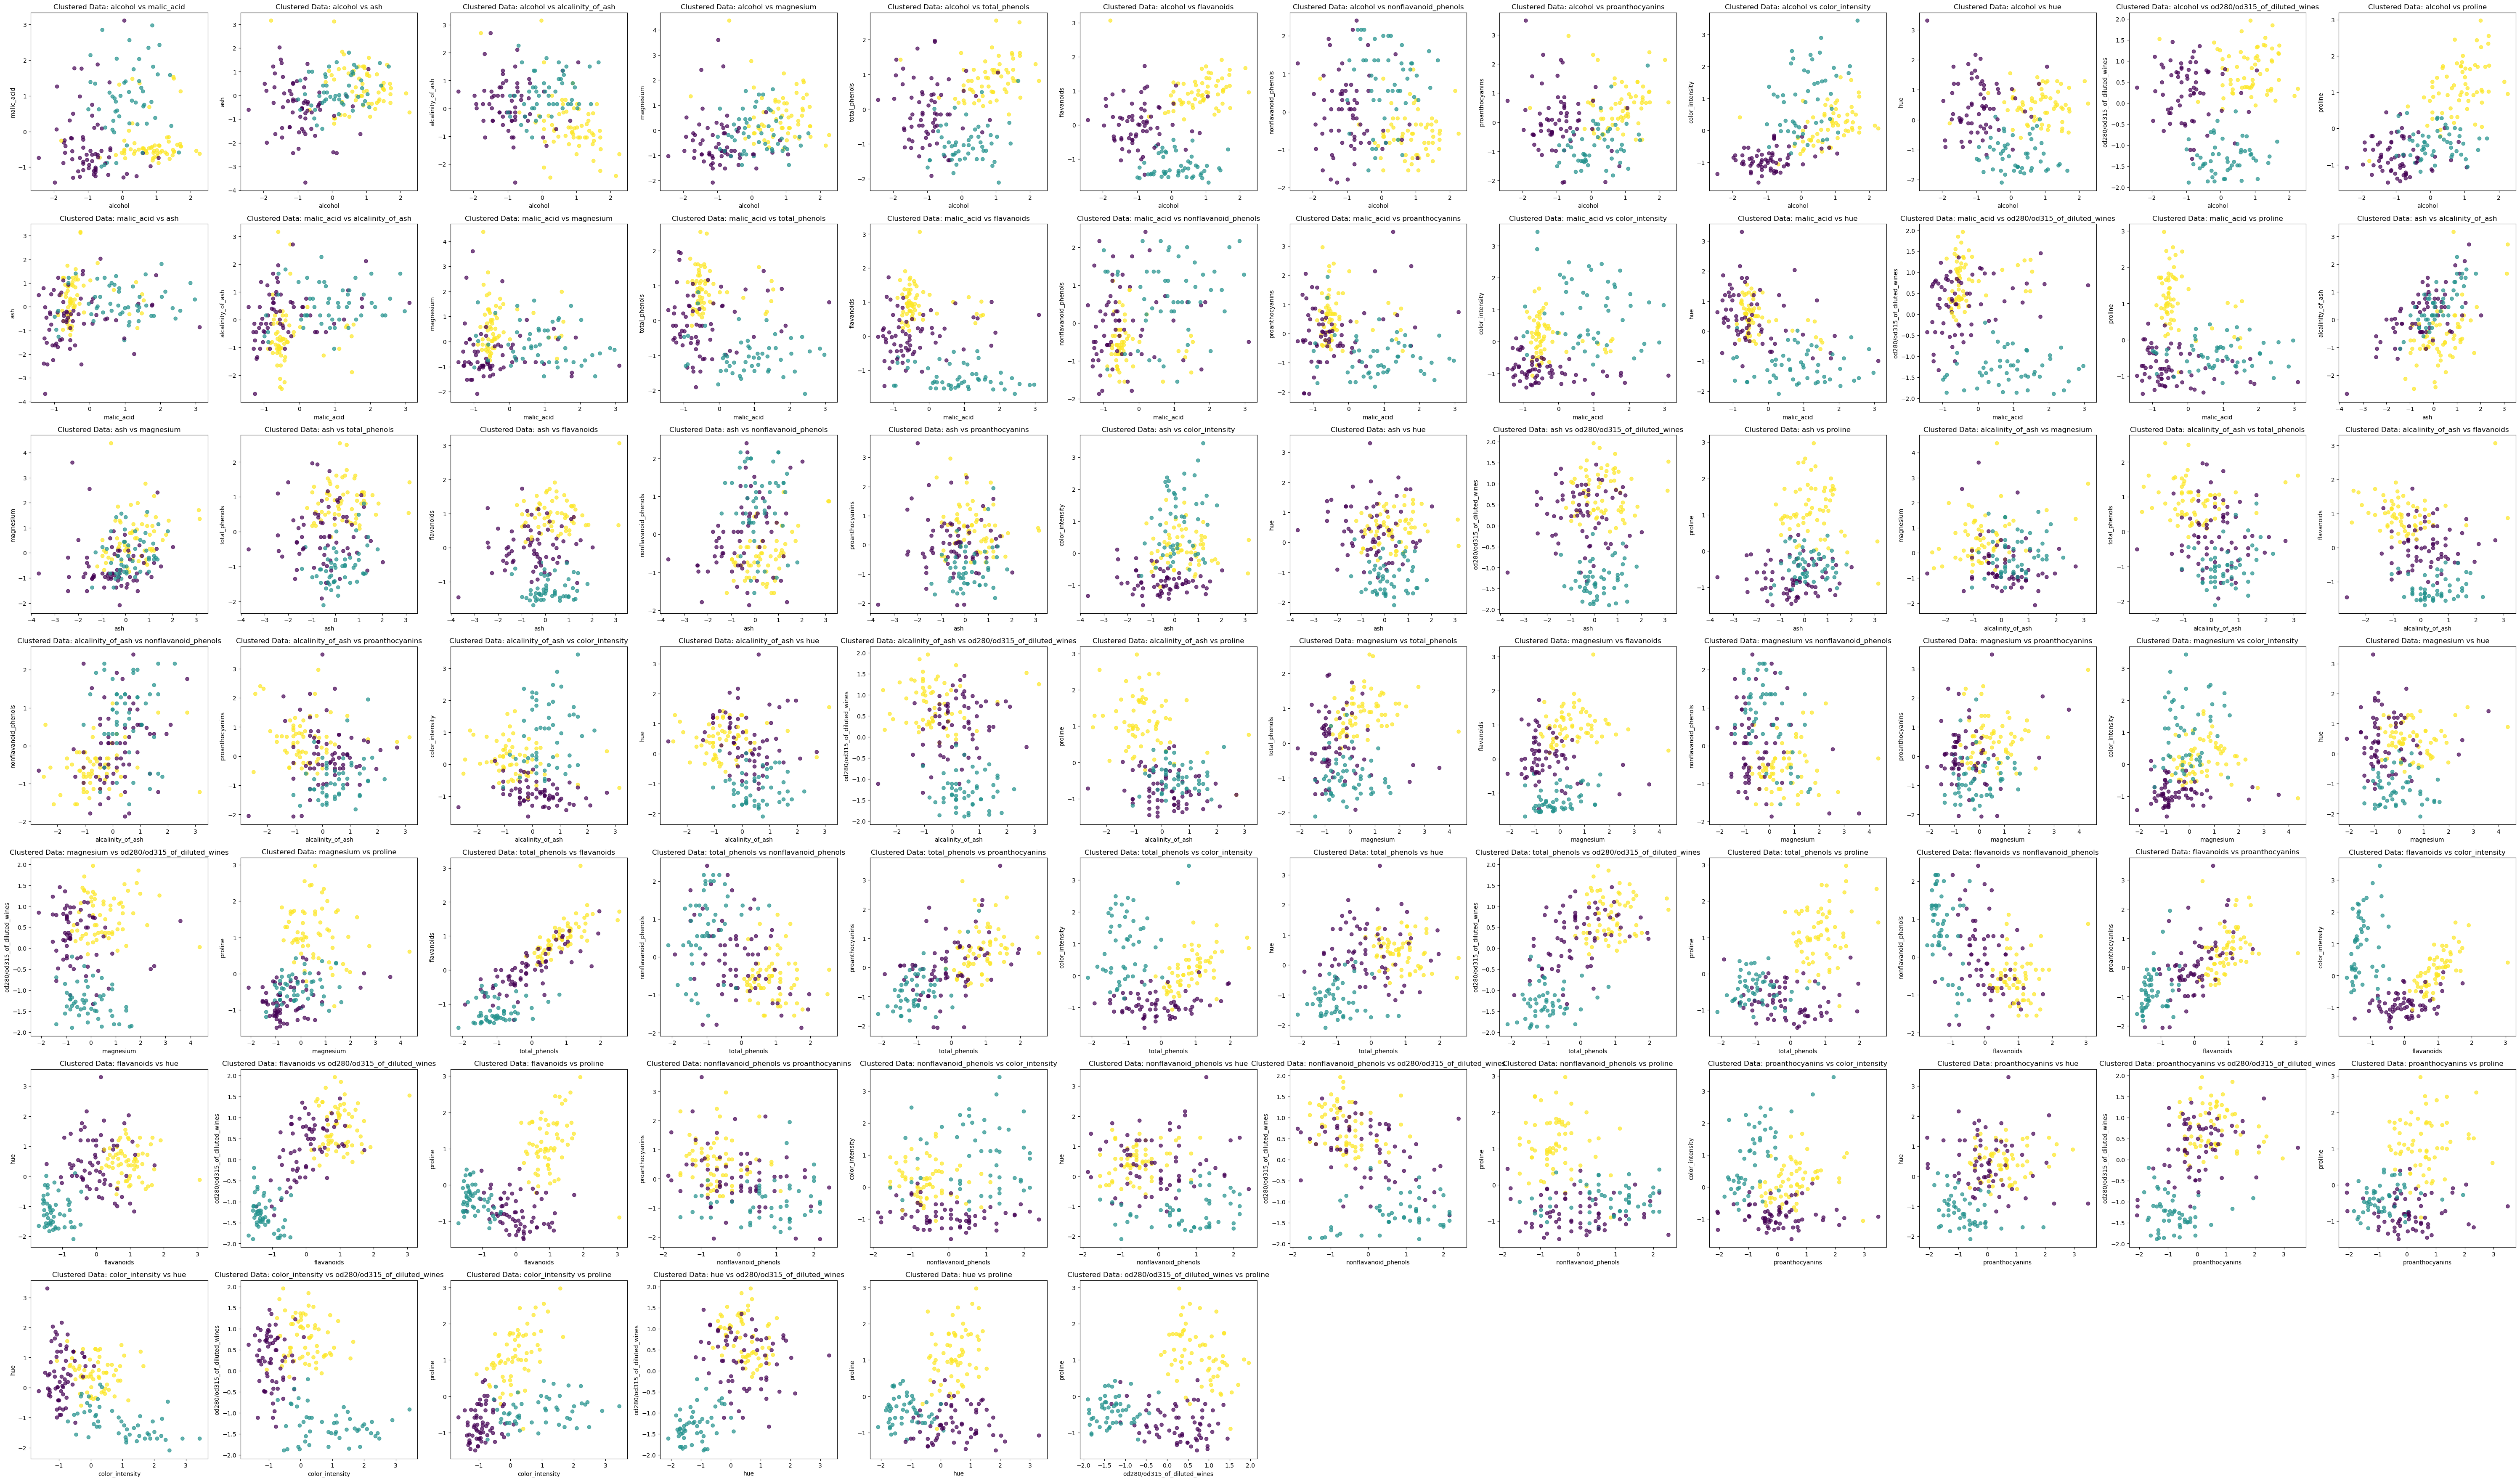

In [60]:
# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_wine_data, feature_names, color_labels=clustered_wine_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

The optimal number of clusters can be determined using the "elbow method".  Meaning, a plot is prepared where the WSSD is plotted on the y-axis and the number of clusters is plotted on the x-axis.  The plot will display an "elbow" where increasing the k value has little impact on WSSD.  This "elbow" or "bend" where WSSD and k are both minimal is probably the ideal k value.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of `color intensity`. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [61]:
# Initialize an empty list to store the bootstrap samples

np.random.seed(123)
wine_bootstrap = []

# Iteratively add bootstrapped sample sets to the empty list.

for i in range(10000):
    sample = clustered_wine_data.sample(frac=1, replace=True) # Sample with replacement
    sample = sample.assign(replicate = i) # Add replicate number
    sample['mean_color_intensity'] = np.mean(sample['color_intensity']) # Calculate the mean of each sample set.
    wine_bootstrap.append(sample) # Store the sample

final_bootleg = pd.concat(wine_bootstrap)

# Used a website for help: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

In [62]:
final_bootleg

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
109 -1.717782   -0.885409  1.218995           0.151661  -0.403135   
126 -0.704864   -0.723829 -0.279695           0.602088  -0.964842   
66   0.135116   -1.190614 -2.436346          -1.349764  -1.526548   
98  -0.778980   -1.136754 -0.974210          -0.298767  -0.824415   
17   1.024507   -0.687923  0.926567           0.151661   1.071345   
..        ...         ...       ...                ...        ...   
20   1.308617   -0.634063 -0.316249          -1.049479   1.843692   
10   1.358028   -0.158301 -0.243142          -0.448909   0.369212   
6    1.716255   -0.418624  0.305159          -1.469878  -0.262708   
88  -1.680724   -0.248068  0.341713           0.632117  -1.105268   
89  -1.137207   -0.903362 -0.243142           1.232687  -2.088255   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
109       0.712858    0.894264             -0.578985         1.575301   
126       0.712858    1.125176              0.226796         0.313800   
66        1.097417    1.155295             -0.820719         1.207363   
98        1.962676    1.727556             -0.981875         0.629175   
17        1.049347    1.376168              0.307374         0.226196   
..             ...         ...                   ...              ...   
20        1.129464    1.145255             -0.981875         0.891988   
10        1.049347    1.295850             -1.143031         1.382572   
6         0.328298    0.492677             -0.498407         0.681738   
88       -0.552984   -0.340615              0.951998        -0.422075   
89       -0.152402   -0.441012              0.468530        -0.369513   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  \
109        -1.041667  0.011190                      0.915707 -0.213021   
126        -0.483652 -1.173391                      0.322481 -1.257535   
66          0.104643  0.713164                      0.802712 -0.779861   
98         -0.241413  0.362177                      0.223610 -0.276711   
17          0.666984  0.757038                     -0.058878  1.220001   
..               ...       ...                           ...       ...   
20          0.256043  0.581544                      1.551307  0.105428   
10          0.299300  1.283518                      0.788587  2.430109   
6           0.083015  0.274431                      1.367689  1.729520   
88         -0.976782  0.186684                      0.195361 -0.213021   
89         -1.435306  0.493797                      0.845085 -0.388168   

     Cluster  replicate  mean_color_intensity  
109        0          0              0.023573  
126        0          0              0.023573  
66         0          0              0.023573  
98         0          0              0.023573  
17         2          0              0.023573  
..       ...        ...                   ...  
20         2       9999             -0.023111  
10         2       9999             -0.023111  
6          2       9999             -0.023111  
88         0       9999             -0.023111  
89         0       9999             -0.023111  

[1780000 rows x 16 columns]

In [63]:
# Determining the mean color intensity as a separate df.

mean_color_intensity = final_bootleg['mean_color_intensity'].reset_index(name='mean_of_color_intensity')

In [64]:
# Previewing mean color intensity df

mean_color_intensity

index  mean_of_color_intensity
0          109                 0.023573
1          126                 0.023573
2           66                 0.023573
3           98                 0.023573
4           17                 0.023573
...        ...                      ...
1779995     20                -0.023111
1779996     10                -0.023111
1779997      6                -0.023111
1779998     88                -0.023111
1779999     89                -0.023111

[1780000 rows x 2 columns]

In [65]:
# Determining the 90% confidence interval of mean color intensity

color_bounds = final_bootleg['mean_color_intensity'].quantile([0.1, 0.9])
color_bounds

0.1   -0.095340
0.9    0.096412
Name: mean_color_intensity, dtype: float64

In [66]:
lower_bound = color_bounds[0.1]
upper_bound = color_bounds[0.9]

In [67]:
# Your answer here...

np.random.seed(123)

# Display the result
print(f"Mean Color Intensity: {mean_color_intensity}")
print(f"90% Confidence Interval of Mean Color Intensity: ({lower_bound}, {upper_bound})")

# Note: mean of color intensity for each bootstrap sample was calculated above in the "for" loop while these bootstrap samples were generated.  
# The text below will just re-display those calculations.
# If we want to calculate these means using code similar to what was demonstrated in class, uncomment the rows below:

# mean_color_intensity = final_bootleg.groupby('replicate')['mean_color_intensity'].mean().reset_index(name='mean_of_color_intensity')
# print(f"Mean Color Intensity: {mean_color_intensity}")


Mean Color Intensity:          index  mean_of_color_intensity
0          109                 0.023573
1          126                 0.023573
2           66                 0.023573
3           98                 0.023573
4           17                 0.023573
...        ...                      ...
1779995     20                -0.023111
1779996     10                -0.023111
1779997      6                -0.023111
1779998     88                -0.023111
1779999     89                -0.023111

[1780000 rows x 2 columns]
90% Confidence Interval of Mean Color Intensity: (-0.09534036594937219, 0.09641207436429593)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

Bootstrapping helps us estimate the mean and confidence intervals for datasets in which we have a limited number of samples.  In this context, we were able to use a relatively small sample set (178 measurements), perform 10,000 sampling trials, and then calculate the mean of color intensity for each trial.  The goal is to approximate the data we could obtain if we had a much larger data set.  Bootstrapping helps us approximate what mean could be expected for a larger data set.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

The confidence interval determines the range of values that likely contain the true mean of color intensity.  So, the true mean of color intensity for wine samples is likely between -0.0953 and 0.0964, even in a much larger dataset.  It's encouraging that this confidence interval contains the mean calculated for the original data set (-3.44E-16). Smaller confidence intervals indicate less variability in the data and a more precise estimated mean, while larger confidence intervals indicate more variability in the data and a broader range of possible means.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the color intensity appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

In [68]:
final_bootleg['color_intensity'].min()

-1.6342882758947095

In [69]:
final_bootleg['color_intensity'].max()

3.4354319244178955

In [70]:
final_bootleg['color_intensity'].mean()

0.00022393518507066051

As calculated above, the range of scaled color intensity values is -1.63 to 3.435.  The 90% confidence interval of -0.095 to 0.093 represents a small fraction of this range.  If we took many sample sets, the mean of color intensity would fall within the range of -0.095 to 0.093 for roughly 90% of them.  The small confidence interval indicates that an estimated mean within this range is likely to be close to the 'true' value.  Also of note is that the confidence interval contains the calculated mean for the scaled data set (-3.44E-16).  I realize that many real-word datasets don't have access to the "true" mean.  

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are correctly interpreted to explore relationships between features and species. | Visualizations are not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 09/21/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
